# Jaylen Brown Sub Times - '23-'24 Season
In the first three games of the season, J. Mazzula has Jaylen Brown playing more with the second unit, a role previously reserved for Jayson Tatum. The question is, when was Jaylen Brown subbed in and out last season?

In [ ]:
import pandas as pd
import numpy as np

fp = '../data/processed/teamplayer/BOS_J. Brown_games.csv'
df = pd.read_csv(fp)

df.shape

In [ ]:
df.columns

In [ ]:
df['actionType'].unique()

In [ ]:
sub_df = df[df['actionType'] == 'Substitution']
sub_df.sample(10)

In [ ]:
subtimes = sub_df[['clock', 'period']].reset_index(drop=True)
subtimes.sample(5)

In [ ]:
# Create a data visualization showing the distribution of clock times
import matplotlib.pyplot as plt
import seaborn as sns

# Convert clock strings to seconds for plotting
def clock_to_seconds(clock_str):
    if ':' in clock_str:
        minutes, seconds = clock_str.split(':')
        return float(minutes) * 60 + float(seconds)
    return float(clock_str)

# Convert clock times to overall game timeline
subtimes['seconds'] = subtimes['clock'].apply(clock_to_seconds)
subtimes['total_seconds'] = (subtimes['period'] - 1) * 720 + subtimes['seconds']

# Create figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Distribution of when Jaylen Brown is subbed OUT')

# Create histogram with 1-minute bins
bins = np.arange(0, 2881, 60)  # Create bins for each minute (60 seconds)
plt.hist(subtimes['total_seconds'], bins=bins, alpha=1)

# Customize plot
ax.set_ylabel('Number of Substitutions')

# Set x-axis ticks to show quarter and time
xticks = np.arange(0, 2881, 720)  # 0, 720, 1440, 2160, 2880 (4 quarters * 720 seconds)
ax.set_xticks(xticks)
labels = []
for q in range(4):
    labels.append(f'Q{q+1} 12:00')
labels.append('Q4 00:00')
ax.set_xticklabels(labels)

# Add vertical lines between quarters
for x in xticks[1:-1]:
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.3)

ax.set_xlim(0, 2880)  # 48 minutes = 2880 seconds
ax.grid(True, alpha=0.3)

plt.xlabel('Game Timeline')
plt.show()


# Boston Sub Times - '23-'24

In [1]:
import pandas as pd

fp = '../data/processed/team/BOS_games.csv'
df = pd.read_csv(fp)

df.shape

(38604, 19)

In [2]:
sub_df = df[(df['actionType'] == 'Substitution') & (df['teamTricode'] == 'BOS')]
sub_df.sample(5)

,game_id,period,clock,home,scoreHome,away,scoreAway,playerNameI,teamTricode,description,actionType,subType,xLegacy,yLegacy,shotDistance,isFieldGoal,shotVal,scoreVal,location
23395,S2324-G0080,3,06:57,BOS,NaN,MIA,NaN,J. Tatum,BOS,SUB: Brissett FOR Tatum,Substitution,NaN,0,0,0,0,NaN,NaN,h
30843,S2324-G0065,4,08:56,NYK,NaN,BOS,NaN,P. Pritchard,BOS,SUB: White FOR Pritchard,Substitution,NaN,0,0,0,0,NaN,NaN,v
24864,S2324-G0389,4,05:05,LAC,NaN,BOS,NaN,D. White,BOS,SUB: Stevens FOR White,Substitution,NaN,0,0,0,0,NaN,NaN,v
28466,S2324-G1034,3,04:10,ATL,NaN,BOS,NaN,K. Porzingis,BOS,SUB: Brissett FOR Porzingis,Substitution,NaN,0,0,0,0,NaN,NaN,v
18111,S2324-G1186,2,03:11,BOS,NaN,WAS,NaN,L. Kornet,BOS,SUB: Springer FOR Kornet,Substitution,NaN,0,0,0,0,NaN,NaN,h


In [3]:
cols = ['period', 'clock', 'playerNameI', 'description']
sub_df = sub_df[cols].reset_index(drop=True)

sub_df.sample(5)

,period,clock,playerNameI,description
875,2,03:13,S. Hauser,SUB: Holiday FOR Hauser
618,4,01:35,A. Horford,SUB: Porzingis FOR Horford
519,4,07:44,P. Pritchard,SUB: Holiday FOR Pritchard
1095,3,04:55,K. Porzingis,SUB: Tillman FOR Porzingis
701,3,03:10,J. Holiday,SUB: Pritchard FOR Holiday


In [4]:
import re

def extract_subs(description):
    sub_match = re.search(r"SUB:\s*([^\s]+)", description)
    for_match = re.search(r"FOR\s*([^\s]+)", description)
    sub_val = sub_match.group(1) if sub_match else None
    for_val = for_match.group(1) if for_match else None
    return pd.Series([sub_val, for_val])
    

sub_df[['sub_in', 'sub_out']] = sub_df['description'].apply(extract_subs)

In [5]:
sub_df.sample(5)

,period,clock,playerNameI,description,sub_in,sub_out
1361,2,04:02,J. Brown,SUB: Holiday FOR Brown,Holiday,Brown
861,4,01:54,S. Hauser,SUB: Davison FOR Hauser,Davison,Hauser
34,4,06:28,L. Stevens,SUB: Brown FOR Stevens,Brown,Stevens
227,2,05:32,S. Hauser,SUB: Pritchard FOR Hauser,Pritchard,Hauser
1337,3,04:17,J. Tatum,SUB: Hauser FOR Tatum,Hauser,Tatum


In [36]:
brown_subs = sub_df[(sub_df['sub_in'] == 'Brown') | (sub_df['sub_out'] == 'Brown')]
tatum_subs = sub_df[(sub_df['sub_in'] == 'Tatum') | (sub_df['sub_out'] == 'Tatum')]
pp_subs = sub_df[(sub_df['sub_in'] == 'Pritchard') | (sub_df['sub_out'] == 'Pritchard')]
white_subs = sub_df[(sub_df['sub_in'] == 'White') | (sub_df['sub_out'] == 'White')]
holiday_subs = sub_df[(sub_df['sub_in'] == 'Holiday') | (sub_df['sub_out'] == 'Holiday')]
horford_subs = sub_df[(sub_df['sub_in'] == 'Horford') | (sub_df['sub_out'] == 'Horford')]
porzingis_subs = sub_df[(sub_df['sub_in'] == 'Porzingis') | (sub_df['sub_out'] == 'Porzingis')]

all_subs = [brown_subs, tatum_subs, pp_subs, white_subs, holiday_subs, horford_subs, porzingis_subs]

In [10]:
tatum_subs.shape[0]

288

In [11]:
brown_subs.shape[0]

237

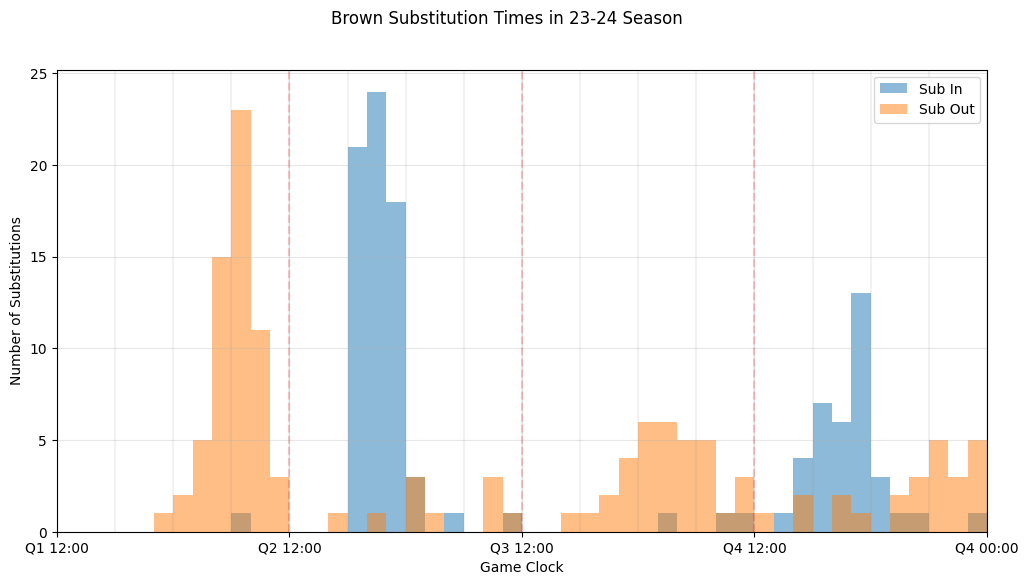

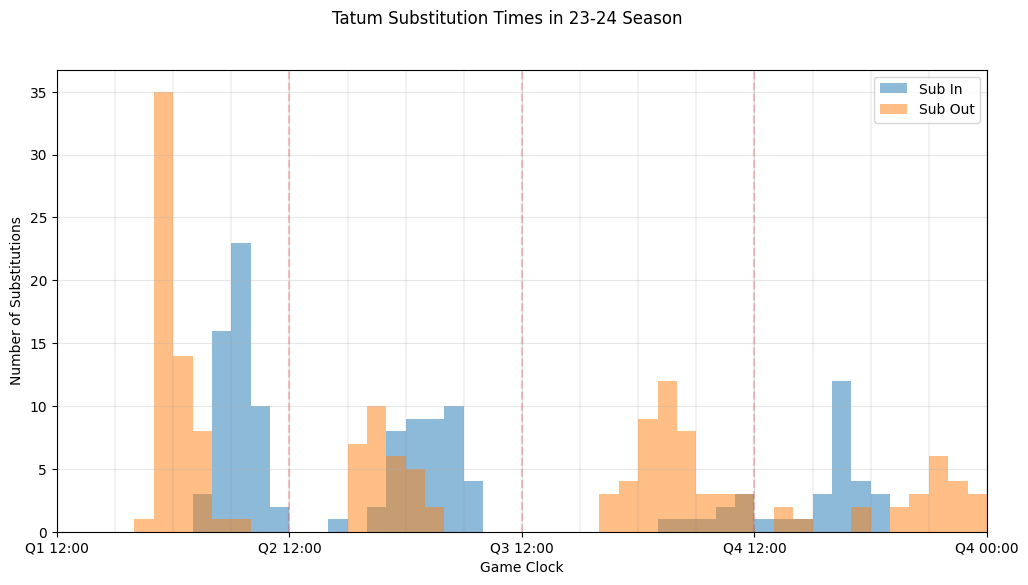

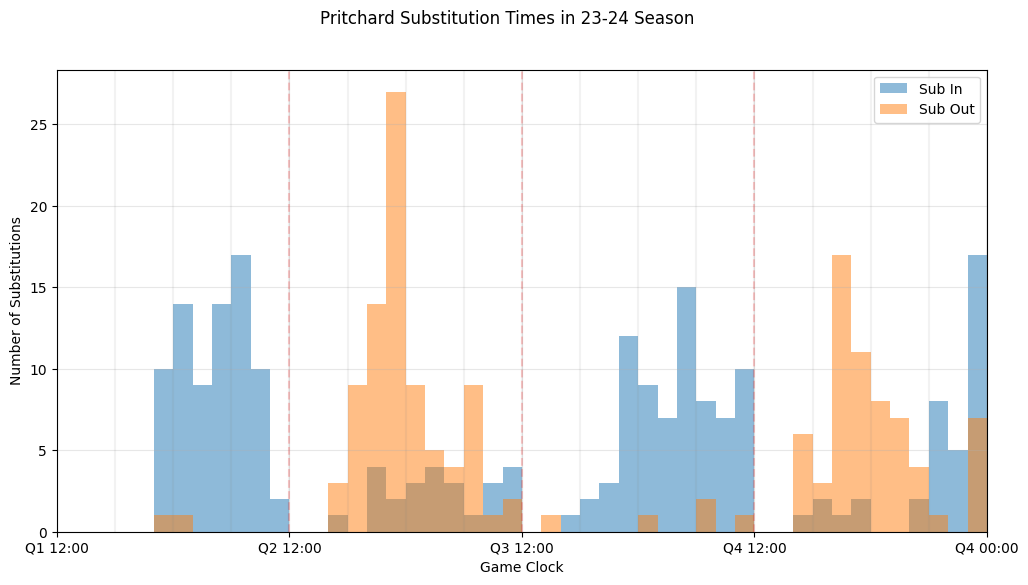

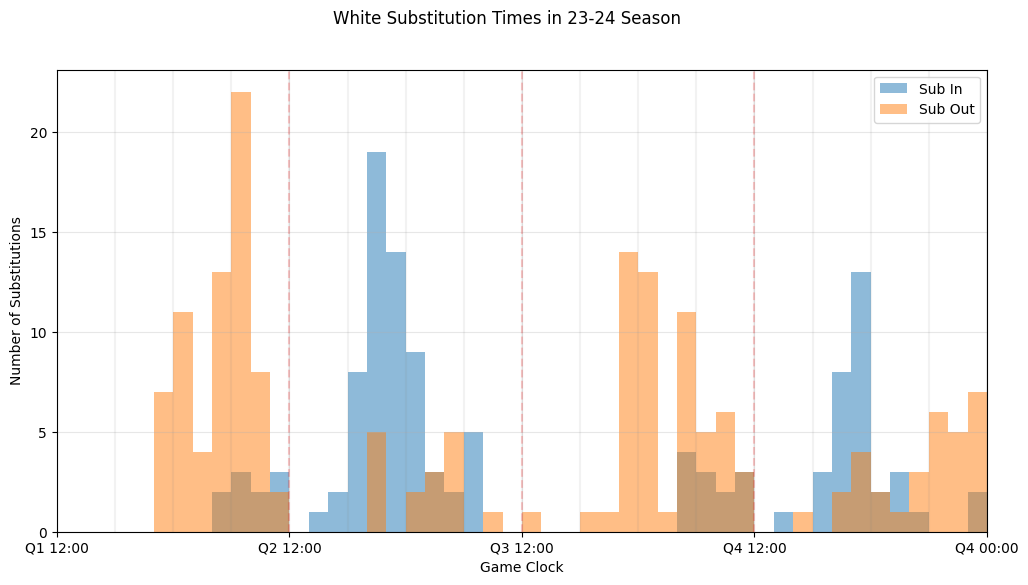

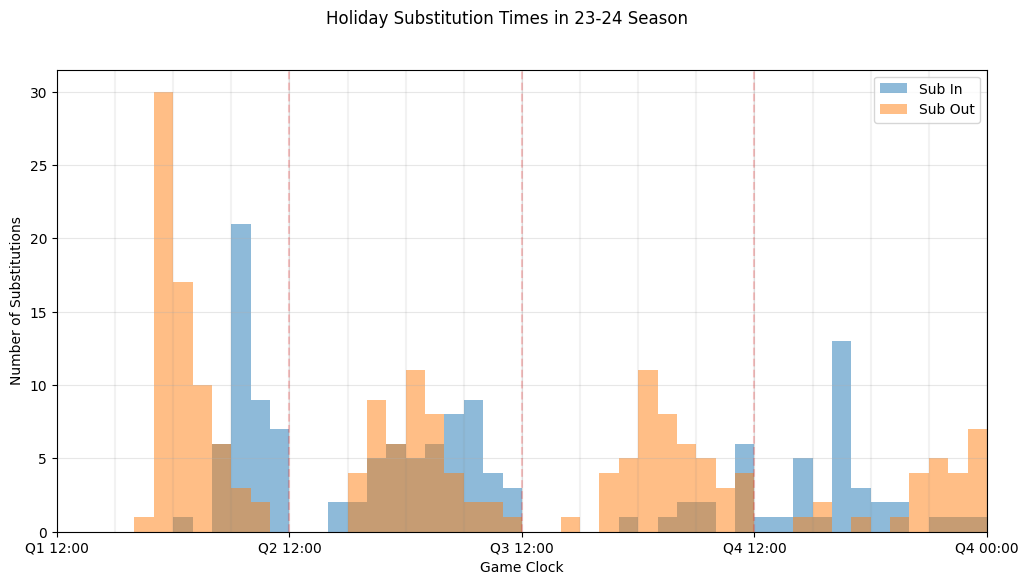

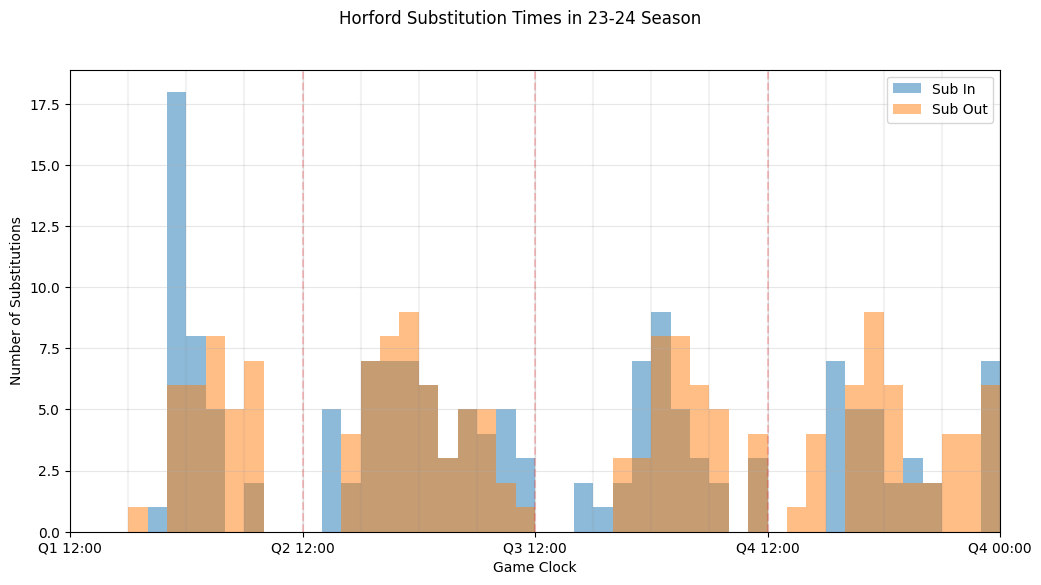

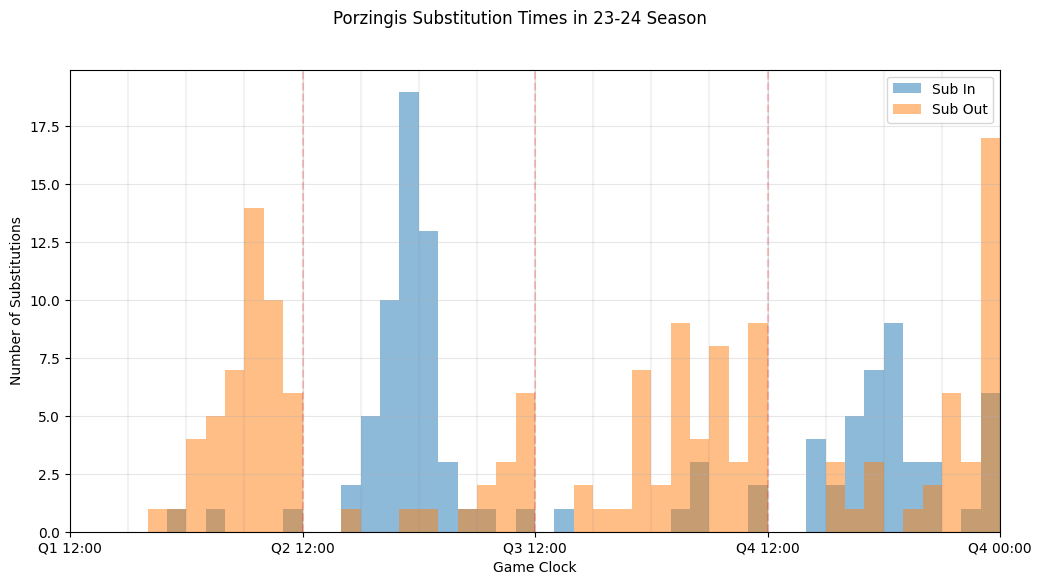

In [37]:
# Create a data visualization showing when Jayson Tatum is subbed in and out
import matplotlib.pyplot as plt
import numpy as np

def player_sub_timeline(sub_df, player_name):
  df = sub_df.copy()
  # Convert clock strings to seconds for plotting
  def clock_to_seconds(clock_str):
    if ':' in clock_str:
      minutes, seconds = clock_str.split(':')
      return 720 - (float(minutes) * 60 + float(seconds))
    return float(clock_str)

  # Convert clock times to overall game timeline
  df['seconds'] = df['clock'].apply(clock_to_seconds)
  df['total_seconds'] = (df['period'] - 1) * 720 + df['seconds']

  # Separate sub in and sub out events
  sub_in_times = df[df['sub_in'] == player_name]['total_seconds']
  sub_out_times = df[df['sub_out'] == player_name]['total_seconds']

  # Create figure
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.suptitle(f"{player_name} Substitution Times in 23-24 Season")

  # Plot sub in and sub out events
  ax.hist(sub_in_times, bins=np.arange(0, 2881, 60), alpha=0.5, label='Sub In')
  ax.hist(sub_out_times, bins=np.arange(0, 2881, 60), alpha=0.5, label='Sub Out')

  # Customize plot
  ax.set_ylabel('Number of Substitutions')
  ax.set_xlabel('Game Clock')

  # Set x-axis ticks to show quarter and time
  xticks = np.arange(0, 2881, 720)  # 0, 720, 1440, 2160, 2880 (4 quarters * 720 seconds)
  ax.set_xticks(xticks)
  labels = []
  for q in range(4):
    labels.append(f'Q{q+1} 12:00')
  labels.append('Q4 00:00')
  ax.set_xticklabels(labels)

  # Add solid vertical lines every 3 minutes
  three_min_ticks = np.arange(0, 2881, 180)  # 0, 180, 360, ..., 2880 (3 minutes * 60 seconds)
  for x in three_min_ticks:
    ax.axvline(x=x, color='gray', linestyle='-', alpha=0.1)

  # Add vertical lines between quarters
  for x in xticks[1:-1]:
    ax.axvline(x=x, color='red', linestyle='--', alpha=0.2)

  ax.set_xlim(0, 2880)  # 48 minutes = 2880 seconds
  ax.grid(True, alpha=0.3)
  ax.legend()

  plt.show()

player_sub_timeline(brown_subs, 'Brown')
player_sub_timeline(tatum_subs, 'Tatum')
player_sub_timeline(pp_subs, 'Pritchard')
player_sub_timeline(white_subs, 'White')
player_sub_timeline(holiday_subs, 'Holiday')
player_sub_timeline(horford_subs, 'Horford')
player_sub_timeline(porzingis_subs, 'Porzingis')


In [22]:
tatum_subs[(tatum_subs['period'] == 1) & (tatum_subs['sub_in'] == 'Tatum')]

,period,clock,playerNameI,description,sub_in,sub_out
21,1,02:36,J. Brown,SUB: Tatum FOR Brown,Tatum,Brown
40,1,01:44,D. White,SUB: Tatum FOR White,Tatum,White
80,1,03:30,J. Brown,SUB: Tatum FOR Brown,Tatum,Brown
99,1,03:15,D. White,SUB: Tatum FOR White,Tatum,White
149,1,01:28,D. White,SUB: Tatum FOR White,Tatum,White
164,1,02:17,J. Brown,SUB: Tatum FOR Brown,Tatum,Brown
184,1,03:10,J. Brown,SUB: Tatum FOR Brown,Tatum,Brown
205,1,03:31,K. Porzingis,SUB: Tatum FOR Porzingis,Tatum,Porzingis
222,1,03:51,L. Stevens,SUB: Tatum FOR Stevens,Tatum,Stevens
243,1,02:37,J. Brown,SUB: Tatum FOR Brown,Tatum,Brown
